# 1D J1-J2: Result comparison-No gradient clipping (10k samples)

This notebook is part of the work arXiv:2505.22083 (https://arxiv.org/abs/2505.22083), "Hyperbolic recurrent neural network as the first type of non-Euclidean neural quantum state ansatz". Code written by HLD. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('../../utility')
numsamples = 10000
rn = 4

In [2]:
def Nt(N, Nv):
    Nt = []
    for (k,j) in zip(N,Nv):
        Nt.append(k)
        Nt.append(j)
    return Nt
    

## Inference results

In [3]:
names = ['Euclidean GRU', 'Hyperbolic GRU', 'Exact']
names_00 = ['eGRU-75-s50', 'hypGRU-60-s50', 'Exact']
j2_0 = [-21.2469, -20.4145, -21.9721]
j2_0v = [0.8893,1.2511, 0.0]
#GC (with gradient clipping)
#j2_0 = [-21.3745,-21.1108, -21.9721]
#j2_0v = [0.3553,1.2100, 0.0]

names_02 = ['eGRU-75-s50', 'hypGRU-75-s50', 'Exact']
j2_2  = [-17.6566,-19.7781, -20.3150]
j2_2v = [3.5418,  1.2865,0.0]
#GC
#j2_2  = [-19.4229,-19.9133, -20.3150]
#j2_2v = [0.1484,  0.4180, 0.0]

names_05 = ['eGRU-75-s50', 'hypGRU-70-s50', 'Exact']
j2_5 =[-17.3347,-18.6643, -18.7500]
j2_5v =[1.6423, 0.4411, 0.0]
#GC
#j2_5 =[-18.6626,-18.6643, -18.7500]
#j2_5v =[0.3745, 0.4411, 0.0]

names_08 = ['eGRU-75-s50', 'hypGRU-75-s50', 'Exact']
j2_8 = [-19.3759, -20.0535, -20.9842]
j2_8v = [1.758, 1.4476, 0.0]
#GC
#j2_8 = [-19.2091, -19.6191, -20.9842]
#j2_8v = [1.75, 2.0725, 0.0]

dd = {'names': names, 'j2_0.0': j2_0, 'j2_00v': j2_0v,
      'j2_0.2': j2_2, 'j2_02v': j2_2v, 'j2_0.5': j2_5, 'j2_05v': j2_5v, 
      'j2_0.8': j2_8, 'j2_08v': j2_8v}
dd

{'names': ['Euclidean GRU', 'Hyperbolic GRU', 'Exact'],
 'j2_0.0': [-21.2469, -20.4145, -21.9721],
 'j2_00v': [0.8893, 1.2511, 0.0],
 'j2_0.2': [-17.6566, -19.7781, -20.315],
 'j2_02v': [3.5418, 1.2865, 0.0],
 'j2_0.5': [-17.3347, -18.6643, -18.75],
 'j2_05v': [1.6423, 0.4411, 0.0],
 'j2_0.8': [-19.3759, -20.0535, -20.9842],
 'j2_08v': [1.758, 1.4476, 0.0]}

In [4]:
df=pd.DataFrame(dd)

df['se_0.0'] = df['j2_00v'].apply(lambda x: np.round(np.sqrt(x/numsamples),rn))
df['se_0.2'] = df['j2_02v'].apply(lambda x: np.round(np.sqrt(x/numsamples),rn))
df['se_0.5'] = df['j2_05v'].apply(lambda x: np.round(np.sqrt(x/numsamples),rn))
df['se_0.8'] = df['j2_08v'].apply(lambda x: np.round(np.sqrt(x/numsamples),rn))
df.set_index('names', inplace = True)
df.drop(['j2_00v', 'j2_02v', 'j2_05v', 'j2_08v'], axis = 1, inplace = True)
#df2 = df[:2]
df

,j2_0.0,j2_0.2,j2_0.5,j2_0.8,se_0.0,se_0.2,se_0.5,se_0.8
names,,,,,,,,
Euclidean GRU,-21.2469,-17.6566,-17.3347,-19.3759,0.0094,0.0188,0.0128,0.0133
Hyperbolic GRU,-20.4145,-19.7781,-18.6643,-20.0535,0.0112,0.0113,0.0066,0.0120
Exact,-21.9721,-20.3150,-18.7500,-20.9842,0.0000,0.0000,0.0000,0.0000


In [5]:
#Create the table with the standard error 
names2 = ['Euclidean GRU', '---', 'Hyperbolic GRU', '---', 'Exact', '---']
dd2 = {'names': names2, 'j2_0.0': Nt(j2_0, df['se_0.0']),
      'j2_0.2': Nt(j2_2,  df['se_0.2']), 'j2_0.5': Nt(j2_5,  df['se_0.5']), 
      'j2_0.8': Nt(j2_8, df['se_0.8'])}
df3=pd.DataFrame(dd2).set_index('names')
df3

,j2_0.0,j2_0.2,j2_0.5,j2_0.8
names,,,,
Euclidean GRU,-21.2469,-17.6566,-17.3347,-19.3759
---,0.0094,0.0188,0.0128,0.0133
Hyperbolic GRU,-20.4145,-19.7781,-18.6643,-20.0535
---,0.0112,0.0113,0.0066,0.0120
Exact,-21.9721,-20.3150,-18.7500,-20.9842
---,0.0000,0.0000,0.0000,0.0000


In [6]:
#Create the table with the variance
names2 = ['Euclidean GRU', '---', 'Hyperbolic GRU', '---', 'Exact', '---']
dd2 = {'names': names2, 'j2_0.0': Nt(j2_0, j2_0v),
      'j2_0.2': Nt(j2_2,  j2_2v), 'j2_0.5': Nt(j2_5,  j2_5v), 
      'j2_0.8': Nt(j2_8, j2_8v)}
df2=pd.DataFrame(dd2).set_index('names')
df2

,j2_0.0,j2_0.2,j2_0.5,j2_0.8
names,,,,
Euclidean GRU,-21.2469,-17.6566,-17.3347,-19.3759
---,0.8893,3.5418,1.6423,1.7580
Hyperbolic GRU,-20.4145,-19.7781,-18.6643,-20.0535
---,1.2511,1.2865,0.4411,1.4476
Exact,-21.9721,-20.3150,-18.7500,-20.9842
---,0.0000,0.0000,0.0000,0.0000


## Plot comparisons

In [7]:
def data_interval(data):
    data = {
       'x': data['x'],
        'y1': [y - e for y, e in zip(data['y'], data['yerr'])],
        'y2': [y + e for y, e in zip(data['y'], data['yerr'])]}
    return data

def plot_ax_errorbar(ax, df,  j2, E_e, ylim = False, yr=[0.5, 1.0]):
    x = np.arange(len(df.index))
    d_i = {'x': x, 'y': df[f'j2_{j2}'], 'yerr': df[f'se_{j2}']}
    ax.bar(x, df[f'j2_{j2}'], color = 'lightblue')
    ax.errorbar(**d_i, alpha=.75,  color='purple', fmt='x', ecolor = 'purple',
                      capsize=4, capthick=2, label= 'VMC')
    
    ax.axhline(E_e, color = 'red', label='DMRG')
    if ylim:
        ax.set_ylim(E_e-yr[0], E_e+yr[1])
    ax.set_xticks(range(len(x)), labels=names[:-1],
                  rotation=90, ha="right", rotation_mode="anchor")
    ax.set_title(f'$J_2$ = {j2}', fontsize = 18)
    ax.set_ylabel('Mean energy', fontsize = 14)
    ax.xaxis.grid(True)
    ax.legend(loc='best')

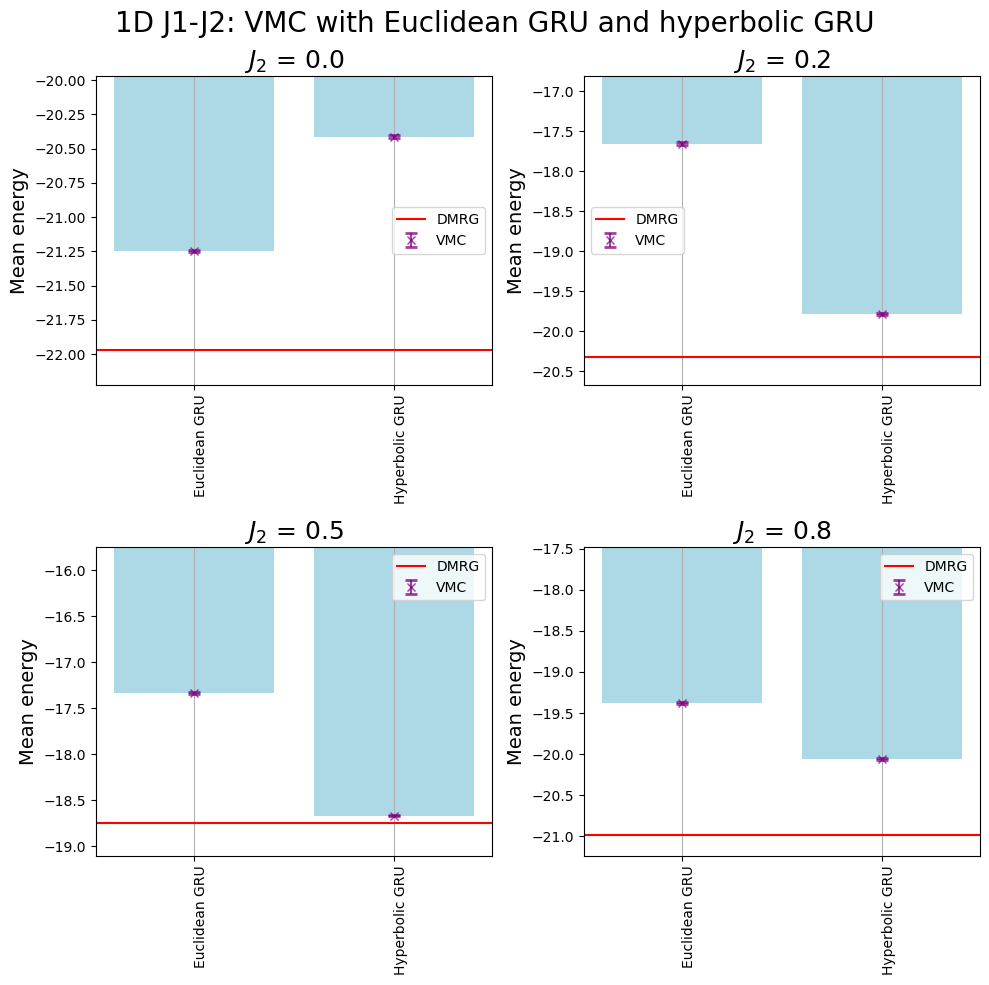

In [14]:
df = df[:2]
fig, ax = plt.subplots(2,2, figsize = (10,10), tight_layout = True)
plot_ax_errorbar(ax[0,0], df, 0.0, -21.9721, ylim = True, yr= [0.25, 2.0])
plot_ax_errorbar(ax[0,1], df, 0.2, -20.3150, ylim = True, yr=[0.35, 3.5])
plot_ax_errorbar(ax[1,0], df,  0.5, -18.7500, ylim =True, yr= [0.35, 3.])
plot_ax_errorbar(ax[1,1], df,  0.8, -20.9842, ylim =True,  yr= [0.25, 3.5])
fig.suptitle('1D J1-J2: VMC with Euclidean GRU and hyperbolic GRU', fontsize = 20)
plt.savefig('1d_j1j2_comparison_10k_ngc.png')